In [1]:
# in this notebook I will go through the nondimensionalization as it stands for the current model
# I will also outline questions for Greg regarding now nondimensionalization "works" for our next meeting
# other "To-Dos" today include implementing the adaptive timestep with the model code as stands
# and reading a paper (tucker and van der beek 2013 - deals with dimensionless stuff)

### Goal: non-dimensionalize these equations, come up with reasonable scales, and define questions relating to how to make use of this method in understanding our model behavior

1. Here are our basic equations. If we can make the terms on the righthand size dimensionless, then the solution will also be dimensionless.

> $$ \eta = \eta_b + H \hspace{1cm} \rightarrow \hspace{1cm} \frac{\partial \eta}{\partial t} = \frac{\partial \eta_b}{\partial t} + \frac{\partial H}{\partial t}$$

2. We start by defining dimensionless versions of our major variables - vertical height (3 terms here - the total height $\eta$, the bedrock height $\eta_b$, and the alluvial thickness $H$), horizontal position ($x$), and time ($t$). We do this by dividing each of these variables by a scale that has the same dimension (either length or time) as the variable that we seek to non-dimensionalize. We'll worry about defining what the scales for horizontal position ($l$) and time ($T$) should be later. We already have a handy scale for vertical height ($H^*$), so we use that for our vertical height scale here. In red we also work on defining a dimensionless version of uplift rate, $U$, and some upift rate scale, $R$. We'll get to why this might be important later.

>$$\eta' = \frac{\eta}{H^*} \hspace{1cm} \rightarrow \hspace{1cm} \eta = \eta'H^*$$

>$$\eta_b' = \frac{\eta_b}{H^*} \hspace{1cm} \rightarrow \hspace{1cm} \eta_b = \eta_b'H^*$$

>$$H' = \frac{H}{H^*} \hspace{1cm} \rightarrow \hspace{1cm} H = H'H^*$$

>$$x' = \frac{x}{l} \hspace{1cm} \rightarrow \hspace{1cm} x = x'l$$

>$$t' = \frac{t}{T} \hspace{1cm} \rightarrow \hspace{1cm} t = t'T$$

>$$\color{red}{U' = \frac{U}{R} \hspace{1cm} \rightarrow \hspace{1cm} U = U'R}$$

3. We'll start by working on the bedrock bit. Bedrock elevation is going to be a function of uplift, plucking, and abrasion:

> $$\frac{\partial \eta_b}{\partial t} = \color{red}{U} - E_\text{total} = \color{red}{U} -(kqS + \beta q_s)$$

> For ease of LaTeX-ing, I've left off the "e-factor." It shouldn't make a difference in our non-dimensionalizing anyway because it's already dimensionless. Uplift will continually be shown in red, since I'm not sure if it needs to be included here or not.

4. Start with a few substitutions:

> $$q = rx$$
> Unit discharge $[L^2/T]$ is equal to a runoff rate multiplied by distance downstream

>$$S = \frac{\partial \eta}{\partial x}$$
> Slope is equal to the change in total elevation over a distance

>$$q_s = cqS \hspace{1cm} \rightarrow \hspace{1cm} q_s = crx\frac{\partial \eta}{\partial x}$$
> Bed sediment flux is equal to the discharge times slope times some factor that determines the fraction carried as bed sediment (function of grain size, roughness, etc). This equation should also be multiplied by the "e-factor," but again we'll skip that for now.

5. So now we have:
> $$\frac{\partial \eta_b}{\partial t} = \color{red}{U} - krx\frac{\partial \eta}{\partial x} - \beta crx\frac{\partial \eta}{\partial x}$$
> This is just another way of writing that bedrock elevation is equal to elevation gained from uplift minus elevation lost to plucking and abrasion.

6. Now time for a bunch of substitutions. Any place where we see one of our major dimensional variables, we want to replace it with its non-dimensional form.

> $$\frac{\partial \eta_b'H^*}{\partial t'T} = \color{red}{U'R} - krx'l\frac{\partial \eta'H^*}{\partial x'l} - \beta crx'l\frac{\partial \eta'H^*}{\partial x'l}$$

7. Pull constants out of derivatives:

> $$\frac{H^*}{T} \frac{\partial \eta_b'}{\partial t'} = \color{red}{U'R} - \frac{H^*}{l}krx'l\frac{\partial \eta'}{\partial x'} - \frac{H^*}{l}\beta crx'l\frac{\partial \eta'}{\partial x'}$$

8. Rearrange to isolate the derivative on the lefthand side:

> $$\frac{\partial \eta_b'}{\partial t'} = \color{red}{\frac{T}{H^*} U'R} - \frac{T}{H^*}\frac{H^*}{l}krx'l\frac{\partial \eta'}{\partial x'} - \frac{T}{H^*}\frac{H^*}{l}\beta crx'l\frac{\partial \eta'}{\partial x'}$$

9. And cancel a bunch of stuff!

> $$\boxed{\frac{\partial \eta_b'}{\partial t'} = \color{red}{\frac{T}{H^*} U'R} - Tkrx'\frac{\partial \eta'}{\partial x'} - T\beta crx'\frac{\partial \eta'}{\partial x'}}$$

> Wahoo! We can check that these are all dimensionless terms now by recalling the dimensions of each variable and making sure they all cancel for both terms on the righthand side. Reminder: $k = [1/L]$ in our case.

> But, <b>TRUCKERS, YOU ARE NOT DOWN YET.</b> We still need to define $T$, our timescale (and $R$, our rate scale, if necessary). We'll do that in a bit, but first we'll repeat these steps for the other term in our governing equation: the alluvial thickness. 

10. For this next part, start by writing the equation for our change in alluvial thickness in more complete terms.

> $$\frac{\partial H}{\partial t} = -\phi \left(\frac{\partial q_s}{\partial x} + \frac{q_s}{\lambda} - \text{sediment generated from plucking}\right)$$

11. Next, make some simplifications and substitutions. We can drop $\phi$ (because it's already dimensionless), distribute the minus sign, and rearrange terms into a move intuitive order. We can replace the grain attrition term with $\beta$, since abrasion coefficients are approximately 1/$\lambda$, where $\lambda$ is the Sternberg length.

> $$\frac{\partial H}{\partial t} = \text{sediment generated from plucking} - \frac{\partial q_s}{\partial x} - \beta q_s$$

12. And finally, we can replace the text bit with the actual formula for sediment generated from plucking, and the $q_s$ with its alternate formulation, as well (from above):

> $$\frac{\partial H}{\partial t} =  krx\frac{\partial \eta}{\partial x} - \frac{\partial \left(crx\frac{\partial \eta}{\partial x}\right)}{\partial x} - \beta crx\frac{\partial \eta}{\partial x}$$

13. Okay, now replace all of our major variables with their dimensionless forms (and also pull some constants out of the second derivative):

> $$\frac{\partial H'H^*}{\partial t'T} =  krx'l\frac{\partial \eta' H^*}{\partial x' l} - crx' l\frac{\partial \left(\frac{\partial \eta' H^*}{\partial x' l}\right)}{\partial x' l} - \beta crx' l\frac{\partial \eta' H^*}{\partial x' l}$$

14. Simplify the derivative in the middle term:

> $$\frac{\partial H'H^*}{\partial t'T} =  krx'l\frac{\partial \eta' H^*}{\partial x' l} - crx' l\frac{\partial^2 \eta' H^*}{\partial (x' l)^2} - \beta crx' l\frac{\partial \eta' H^*}{\partial x' l}$$

15. Pull out constants:

> $$\frac{H^*}{T} \frac{\partial H'}{\partial t'} =  \frac{H^*}{l} krx'l\frac{\partial \eta'}{\partial x'} - \frac{H^*}{l^2} crx' l\frac{\partial^2 \eta'}{\partial x'^2} - \frac{H^*}{l}\beta crx' l\frac{\partial \eta'}{\partial x'}$$

16. Isolate the derivative on the LHS by rearranging and distributing the constants:

> $$\frac{\partial H'}{\partial t'} =  \frac{T}{H^*} \frac{H^*}{l} krx'l\frac{\partial \eta'}{\partial x'} - \frac{T}{H^*} \frac{H^*}{l^2} crx' l\frac{\partial^2 \eta'}{\partial x'^2} - \frac{T}{H^*} \frac{H^*}{l}\beta crx' l\frac{\partial \eta'}{\partial x'}$$

17. Cancel:

> $$\boxed{\frac{\partial H'}{\partial t'} =  Tkrx'\frac{\partial \eta'}{\partial x'} - \frac{T}{l} crx' \frac{\partial^2 \eta'}{\partial x'^2} - T\beta crx' \frac{\partial \eta'}{\partial x'}}$$

18. Okay, it is now time to come up with reasonable scales for all of our scaling factors, substitute those into our boxed equations, do some more simplifying, and then we will have our "dimensionless groups." For starters, here's a refresher of the two equations we've arrived at that we'll be plugging our newly-defined scales into:

> For bedrock:
> $$\boxed{\frac{\partial \eta_b'}{\partial t'} = \color{red}{\frac{T}{H^*} U'R} - Tkrx'\frac{\partial \eta'}{\partial x'} - T\beta crx'\frac{\partial \eta'}{\partial x'}}$$

> And for alluvium:
> $$\boxed{\frac{\partial H'}{\partial t'} =  Tkrx'\frac{\partial \eta'}{\partial x'} - \frac{T}{l} crx' \frac{\partial^2 \eta'}{\partial x'^2} - T\beta crx' \frac{\partial \eta'}{\partial x'}}$$

> So, we need to come up with what $T$, $l$, and $R$ should be. For $T$, use the time to transport a given unit volume of sediment; for $l$, use the length scale of a saltation; for $R$, use the rate of plucking over a waterfall at the outlet, i.e. where $\text{slope} = 1$ and $x = 1$ (i.e., the full length of the domain):
>> $$T = \frac{\beta {H^*}^2}{cr}$$
>> $$l = \frac{1}{\beta}$$
>> $$R = krx = krx'l = \frac{kr}{\beta}x'$$

19. Alright, time to replace the scale factors in our boxed equations:

> For bedrock:
> $$\frac{\partial \eta_b'}{\partial t'} = \color{red}{\frac{\beta {H^*}^2}{crH^*} \frac{kr}{\beta}x'U'} - \frac{\beta {H^*}^2}{cr} krx'\frac{\partial \eta'}{\partial x'} - \frac{\beta {H^*}^2}{cr} \beta crx'\frac{\partial \eta'}{\partial x'}$$

> For alluvium:
> $$\frac{\partial H'}{\partial t'} =  \frac{\beta {H^*}^2}{cr}krx'\frac{\partial \eta'}{\partial x'} - \frac{\beta {H^*}^2 \beta}{cr} crx' \frac{\partial^2 \eta'}{\partial x'^2} - \frac{\beta {H^*}^2}{cr} \beta crx' \frac{\partial \eta'}{\partial x'}$$

20. Okay, now time to cancel a whole bunch of stuff:

> For bedrock:
> $$\frac{\partial \eta_b'}{\partial t'} = \color{red}{\frac{H^* k}{c} x'U'} - \frac{\beta {H^*}^2 k}{c} x'\frac{\partial \eta'}{\partial x'} - \beta^2 {H^*}^2 x'\frac{\partial \eta'}{\partial x'}$$

> For alluvium:
> $$\frac{\partial H'}{\partial t'} =  \frac{\beta {H^*}^2 k}{c}x'\frac{\partial \eta'}{\partial x'} - \beta^2 {H^*}^2 x' \frac{\partial^2 \eta'}{\partial x'^2} - \beta^2 {H^*}^2 x' \frac{\partial \eta'}{\partial x'}$$

21. Finally, we can identify three dimensionless groups and the terms that they control:

> $$\color{red}{\frac{H^* k}{c}}$$
> Controls uplift? Still don't think this makes sense because uplift rate (baselevel fall rate) is externally implemented and constant, rather than changing through space and time in the model. HOWEVER, the uplift term still needs to be dimensionless for consistency when writing out $\frac{\partial \eta_b}{\partial t} = U - E$. Even though this isn't how it's implemented in my code. So... unsure what to do with this or if it's necessary or not. If it's okay to just write $\frac{\partial \eta_b}{\partial t} = - E$, then we can just ignore this piece.

> $$\color{green}{\frac{\beta {H^*}^2 k}{c}}$$
> Controls bedrock erosion via plucking

> $$\color{green}{\beta^2 {H^*}^2}$$
> Controls all the directly sediment-dependent processes: erosion via abrasion, sediment flux divergence, and grain attrition. 

## Questions:

1. What does it mean to write model in dimensionless space - particularly as this relates to the timestep being dimensional? (I think Greg said he prefers to write models dimensionlessly.)


2. Does uplift need to be included in the bedrock elevation equation? If so, does it need to be modified with a dimensionless coefficient?


3. My plan is run the model with different values of beta, H*, etc., and to pull out and plot those metrics which should depend on these dimensionless coefficients. For example, the plucking rate should be the same whether beta is doubled or k is doubled. But is this a reasonable expectation? Changing beta will also impact the behavior of all directly "sediment-dependent" processes, which will in turn effect sediment cover and therefore bedrock erosion rate... but maybe the idea is that the increase in bedrock plucking due to increased bed exposure from increasing beta will have the exact same effect as increase in plucking from higher k?


4. Is it wrong that this resolves to less than four dimensionless groups? Or are there other dimensionless groups, just not represented here?

In [2]:
# okay, now it's time to test out some of this on our model
# we'll use the adaptive timestep, and first test it by seeing if it produces instability in any of the same runs
# in which it did when I was making figures for GSA (like, 100 timesteps, maybe?)
# and hopefully it's stable!
# if it is, we'll move on to plotting metrics 
# and how they compare with tweaking different variables in our dimensionless coefficients

In [3]:
# start by importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# SET UP (scaled down) GRID ARRAYS
dx = 1
x = np.arange(0, 10, dx)

# set up references to topography
Hstar = 0.1
H = Hstar + np.zeros(len(x))
etab = -H
eta = etab + H

# abrasion coefficients from Attal and Lave 2006 in % per km
beta_ig = np.zeros(len(x))
beta_ig[:5] = 0.000004
beta_sed = np.zeros(len(x))
beta_sed[5:] = 0.000064

# erodibility values
k_ig = np.zeros(len(x))
k_ig[:5] = 0.0001
k_sed = np.zeros(len(x))
k_sed[5:] = 0.001

In [5]:
# write a function that has two bedrock lithologies in the domain, but only one contributing sediment to bedload
def two_lith_one_sed(x,
                     dx,
                     Hstar,
                     H,
                     etab,
                     eta,
                     beta_ig,
                     beta_sed,
                     k_ig,
                     k_sed,
                     c = 1,
                     baselevel_rate = 0.001,
                     num_steps = 500000, 
                     porosity = 0.55):
    
    H[-1] = 0.0
    bedrock_ero = np.zeros(len(x))  # bedrock erosion rate
    sedimentation_rate = np.zeros(len(x))
    total_ero = np.zeros(len(x))
    total_ero[-1] = baselevel_rate
    q = x  # discharge = distance downstream (first node is left edge of 0th cell)
    qs = np.zeros(len(x))  # first node is left edge of 0th cell
    #dt = 0.2 * dx * dx / (c*q[-1])  # time-step size
    dt_global = 0.2 * dx * dx / (c*q[-1])  # "global" time-step size
    run_duration = dt_global * num_steps  # <== here's how long we want to run
    cum_time = 0.0  # <== keep track of elapsed time

    #for i in range(num_steps):
    while cum_time < run_duration:  # <== use a while loop because dt varies by iteration
        
        # print('Time:', cum_time)

        # Calculate rates
        
        #  calc slope
        S = -np.diff(eta)/dx
        
        #  calculate e factor
        efac = np.exp(- H / Hstar)
        
        #  calculate total bedload sed flux and set boundary condition
        qs[1:] = c * q[1:] * S * (1.0 - efac[:-1])
        qs[0] = 0
        
        #  calc bedrock erosion from stream power (plucking)
        ero_plucking_ig = efac[:-1] * (k_ig[1:] * q[1:] * S)
        ero_plucking_sed = efac[:-1] * (k_sed[1:] * q[1:] * S)
        
        #  calc bedrock erosion from abrasion
        #ero_ab_ig = efac[:-1] * (beta_ig[:-1] * qs[:-1])
        #ero_ab_sed = efac[:-1] * (beta_sed[:-1] * qs[:-1])
        ero_ab_ig = efac[:-1] * (beta_ig[:-1] * qs[1:])   # <== change indexing: qs[1] represents node 0
        ero_ab_sed = efac[:-1] * (beta_sed[:-1] * qs[1:])
        
        #  calc bedrock erosion rate from stream power and abrasion
        bedrock_ero[:-1] = ero_plucking_ig + ero_plucking_sed + ero_ab_ig + ero_ab_sed
        
        #  calc grain attrition rate
        # atr = beta_ig[1:] * qs[1:]
        atr = 0.000004 * qs[1:]
        
        #  calc rate of change in alluvial thickness
        sedimentation_rate[:-1] = -((1 / porosity) * ((np.diff(qs)/dx) + atr - ero_plucking_ig))
        
        # Calculate maximum allowable time-step size
        
        #  track total erosion rate
        #total_ero = bedrock_ero + sedimentation_rate
        total_ero[-1] = bedrock_ero[-1] - sedimentation_rate[-1]  # <== erosion is MINUS sed rate
        
        #  set adaptive timestep
        #  first check time to flat surface
        elev_diff = np.diff(eta)/dx
        ero_diff = np.diff(total_ero)/dx
        #valid_places = np.where(ero_diff < 0)
        valid_places = np.where(ero_diff < 0)[0]  # <== we just want the array, not the full tuple from where()
        if len(valid_places) > 0:  # <== in case there ARE no locations...
            times_to_flat = np.abs(elev_diff[valid_places]/ero_diff[valid_places])
        else:
            times_to_flat = np.array([dt_global])  # <== ...we just revert to the global dt
        min_time_to_flat = np.amin(times_to_flat)

        #  then check time to deplete all sediment
        #sed_depletion_locations = np.where(sedimentation_rate < 0)
        sed_depletion_locations = np.where(sedimentation_rate < 0)[0]  # <== we just want the array, not the full tuple from where()
        if len(sed_depletion_locations) > 0:  # <== in case there ARE no locations...
            times_to_no_sed = np.abs(H[sed_depletion_locations]/sedimentation_rate[sed_depletion_locations])
        else:
            times_to_no_sed = np.array([dt_global])  # <== ...we just revert to the global dt
        min_time_to_no_sed = np.amin(times_to_no_sed)

        #  check for smaller condition
        #if np.min(times_to_flat) <= np.min(times_to_no_sed):
        #    dt = 0.2 * np.min(times_to_flat)
        #else:
        #    dt = 0.2 * np.min(times_to_no_sed)
        dt = min(min_time_to_flat, min_time_to_no_sed)

        #  if larger than global step size, limit to global
        dt = min(dt, dt_global)
        
        # Update quantities
        
        #  lower baselevel
        eta[-1] -= baselevel_rate * dt 
        
        #  set boundary conditions
        etab[-1] = eta[-1]
        
        #  calc change in bedrock elev
        etab[:-1] -= bedrock_ero[:-1] * dt
        
        #  update sediment thickness
        H[:-1] += sedimentation_rate[:-1] * dt
        H[H < 0] = 0

        #  update elev
        eta[:-1] = etab[:-1] + H[:-1]
        
        # Advance time
        cum_time += dt

#         print("slope: ", S, "\n")
#         print("sed flux: ", qs, "\n")
#         print("efac: ", efac, "\n")
#         print("topography: ", eta, "\n")
#         print("bedrock: ", etab, "\n")
#         print("igneous plucking rate: ", ero_plucking_ig, "\n")
#         print("sedimentary plucking rate: ", ero_plucking_sed, "\n")
#         print("igneous abrasion rate: ", ero_ab_ig, "\n")
#         print("sedimentary abrasion rate: ", ero_ab_sed, "\n")
#         print("bedrock erosion rate: ", bedrock_ero, "\n")
#         print("attrition: ", atr, "\n")
#         print("sedimentation rate: ", sedimentation_rate, "\n")
#         print("sediment thickness: ", H, "\n")
#         print("total erosion rate: ", total_ero, "\n")
#         print("elevaion differences: ", elev_diff, "\n")
#         print("erosion rate differences: ", ero_diff, "\n")
#         print("location of negative erosion rates: ", valid_places, "\n")
#         print("times to flat: ", times_to_flat, "\n")
#         print("times to no sed: ", times_to_no_sed, "\n")
#         print("timestep: ", dt, "\n")
        
    return (S, qs, efac, eta, etab, ero_plucking_ig, ero_plucking_sed, ero_ab_ig, ero_ab_sed, bedrock_ero, atr, 
            sedimentation_rate, H, total_ero, elev_diff, ero_diff, valid_places, times_to_flat, 
            times_to_no_sed, dt)

In [6]:
# up first, run our landscape for 100 timesteps

(S,
qs,
efac,
eta, 
etab,
ero_plucking_ig, 
ero_plucking_sed,
ero_ab_ig,
ero_ab_sed,
bedrock_ero, 
atr, 
sedimentation_rate, 
H, 
total_ero,
elev_diff,
ero_diff,
valid_places,
times_to_flat,
times_to_no_sed,
dt) = two_lith_one_sed(x,
                       dx,
                       Hstar,
                       H,
                       etab,
                       eta,
                       beta_ig,
                       beta_sed,
                       k_ig,
                       k_sed,
                       num_steps = 850000)

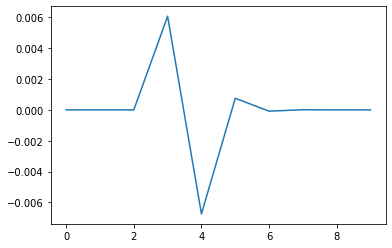

In [7]:
plt.plot(x, sedimentation_rate)